# Lists of bodies and their transforms

We might want to have several distinct bodies. Here, we discuss how
to combine bodies into lists, and similarly, their transforms.

In [1]:
using RigidBodyTools
using Plots

## Body list
Suppose we have two bodies and we wish to combine them into a single list.
The advantage of doing so is that many of the operations we have presented
previously also extend to lists. We use `BodyList` to combine them.

In [2]:
b1 = Circle(1.0,0.02)
b2 = Rectangle(1.0,2.0,0.02)
bl = BodyList([b1,b2])

BodyList(Body[Circular body with 312 points and radius 1.0
   Current position: (0.0,0.0)
   Current angle (rad): 0.0
, Closed polygon with 4 vertices and 600 points
   Current position: (0.0,0.0)
   Current angle (rad): 0.0
])

Another way to do this is to push each one onto the list:

In [3]:
bl = BodyList()
push!(bl,b1)
push!(bl,b2)

2-element Vector{Body}:
 Circular body with 312 points and radius 1.0
   Current position: (0.0,0.0)
   Current angle (rad): 0.0

 Closed polygon with 4 vertices and 600 points
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


We can transform the list by creating a list of transforms with a `MotionTransformList`

In [4]:
X1 = MotionTransform([2.0,3.0],0.0)
X2 = MotionTransform([-2.0,-0.5],π/4)
tl = MotionTransformList([X1,X2])

MotionTransformList(MotionTransform[2d motion transform, x = [2.0, 3.0], R = [1.0 0.0; -0.0 1.0], 2d motion transform, x = [-2.0, -0.5], R = [0.7071067811865476 0.7071067811865475; -0.7071067811865475 0.7071067811865476]])

The transform list can be applied to the whole body list simply with

In [5]:
tl(bl)

2-element Vector{Body{N, RigidBodyTools.ClosedBody} where N}:
 Circular body with 312 points and radius 1.0
   Current position: (2.0,3.0)
   Current angle (rad): 0.0

 Closed polygon with 4 vertices and 600 points
   Current position: (-2.0,-0.5)
   Current angle (rad): 0.7853981633974483


which creates a copy of the body list and transforms that, or

In [6]:
update_body!(bl,tl)

2-element Vector{Body{N, RigidBodyTools.ClosedBody} where N}:
 Circular body with 312 points and radius 1.0
   Current position: (2.0,3.0)
   Current angle (rad): 0.0

 Closed polygon with 4 vertices and 600 points
   Current position: (-2.0,-0.5)
   Current angle (rad): 0.7853981633974483


which updates each body in `bl` in place.

Let's see our effect

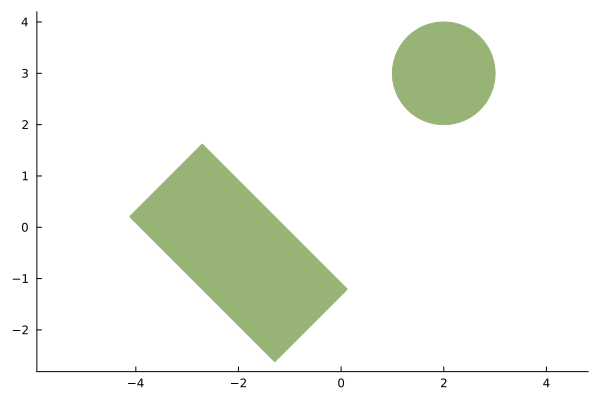

In [7]:
plot(bl)

It is important to note that the list points to the original bodies,
so that any change made to the list is reflected in the original bodies, e.g.

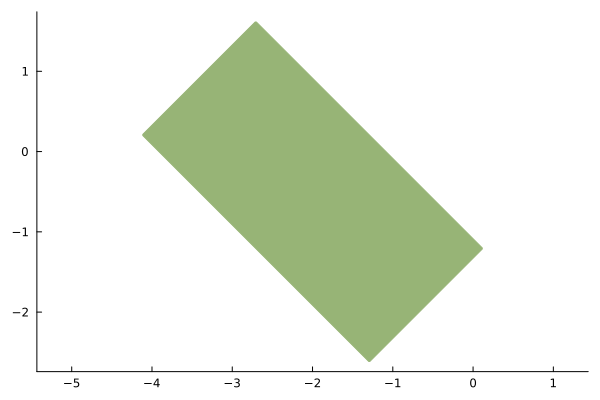

In [8]:
plot(b2)

## Utilities on lists
There are some specific utilities that are helpful for lists. For example,
to collect all of the x, y points (the segment midpoints) in the list into two
vectors, use

In [9]:
x, y = collect(bl)

([3.0000000000000018, 2.9997972289848516, 2.999188998171572, 2.9981755542233195, 2.996757308134212, 2.9949348350626477, 2.9927088740980556, 2.990080327961166, 2.9870502626379167, 2.9836199069471467  …  -1.4272435072388965, -1.4131013716151657, -1.3989592359914347, -1.384817100367704, -1.370674964743973, -1.356532829120242, -1.342390693496511, -1.32824855787278, -1.314106422249049, -1.299964286625318], [3.0, 3.0201370532654406, 3.0402659401094154, 3.0603784974222856, 3.0804665687167256, 3.100522007435517, 3.1205366802553227, 3.1405024703850923, 3.1604112808577587, 3.180255037813904  …  -2.486970055134199, -2.5011121907579295, -2.51525432638166, -2.5293964620053915, -2.543538597629122, -2.5576807332528535, -2.571822868876584, -2.5859650045003155, -2.600107140124046, -2.614249275747777])

In a vector comprising data on these concatenated surface points, we
can use `view` to look at just one body's part and change it:

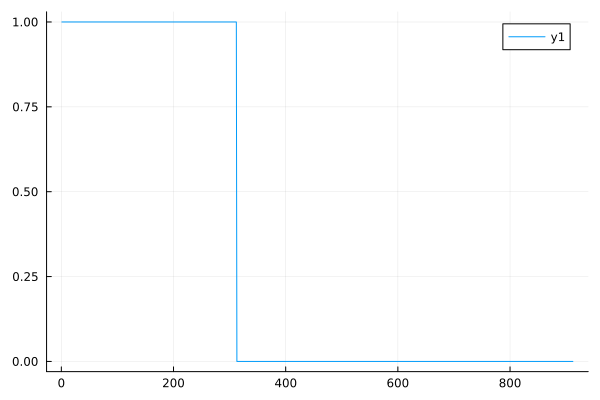

In [10]:
f = zero(x)
f1 = view(f,bl,1)
f1 .= 1.0;
plot(f)

Also, we can sum up the values for one of the bodies:

In [11]:
sum(f,bl,2)

0.0

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*